# The A to Z of R - From basic commands to beautiful plots with ggplot

## The aim of this presentation is to introduce you to the basics of the R programming language.

## We will cover:

## *The absolute basics of R - assigning variables, creating dataframes, simple functions;*

## *The 'grammar of graphics' - beautiful plots created with ggplot2; and*

## *Correlations and correlograms*

# **The R 'starter kit'**

## What you will need:

## A version of R, downloaded from https://cran.r-project.org/; and

## Some kind of IDE - RStudio comes highly recommended, but platforms such as PyCharm and Atom also support R. You can also create R environments with Anaconda

## **Optional extras:** Tools like Shiny allow building of webapps, while Markdown offers an attractive notebook interface 

In [1]:
options(repr.plot.width = 6, repr.plot.height = 4.5)

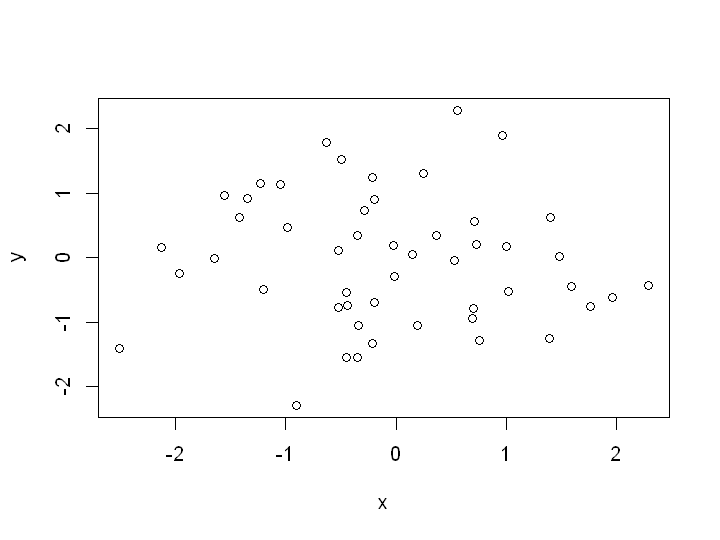

In [2]:
# First, let's create some variables and plot them
x <- rnorm(50)
y <- rnorm(x)
# Generate two pseudo-random normal vectors of x- and y-coordinates.
# Note how, above, we used '<-' to assign to a variable. In R, the '=' is generally used for function arguments only 

plot(x, y) # Plot using the built-in R 'plot' function 

In [3]:
# We can use ls() to show the variables in our workspace (and remove them with rm())
ls()

# Importantly, we can create a dataframe as follows:
test <- data.frame(x = x, y = x + rnorm(x))
test  # and display it...

[1] "x" "y"

x,y
-0.44531991,-0.57314864
-1.64460276,-1.44764931
0.73280084,0.78537622
-0.28770335,-2.87848448
-1.34119490,1.26997841
-0.98297708,-2.19425485
0.53001226,0.54472735
0.70912169,-0.99768989
1.95688549,2.06512100
0.56099286,0.37992655


In [4]:
# Fit a simple linear regression and look at the analysis. 
# With y to the left of the tilde, we are modelling y dependent on x
fm <- lm(y ~ x, data = test)
summary(fm)


Call:
lm(formula = y ~ x, data = test)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.46394 -0.46883  0.00312  0.39368  2.74032 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1262     0.1257  -1.004     0.32    
x             1.0022     0.1157   8.658 2.27e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8873 on 48 degrees of freedom
Multiple R-squared:  0.6096,	Adjusted R-squared:  0.6015 
F-statistic: 74.97 on 1 and 48 DF,  p-value: 2.27e-11


In [5]:
# Note that, now that our variables are inside a dataframe, we now need to use a $ sign 
# to isolate that variable
test$y

[1] -0.57314864 -1.44764931  0.78537622 -2.87848448  1.26997841 -2.19425485
 [7]  0.54472735 -0.99768989  2.06512100  0.37992655  0.18645482  1.49889076
[13]  1.86842390 -1.34462796  0.45217764 -0.07654591 -2.32943114  0.32839173
[19] -0.82713139  1.25219363  0.58739446 -0.77965698  1.46903153  1.90437999
[25] -1.12395102  0.73223158 -3.52903235  1.25476684  1.42375951 -0.41922735
[31] -0.97298505  0.37341660 -3.16530890 -0.17104998 -0.24977145 -0.64930436
[37]  0.01731107 -1.00486190  2.06107411 -1.01869105 -0.21801081 -1.45791347
[43] -0.89666895  0.57701256  0.71953406  2.20618322 -0.14187521 -1.86873727
[49] -1.65188408 -1.39567696

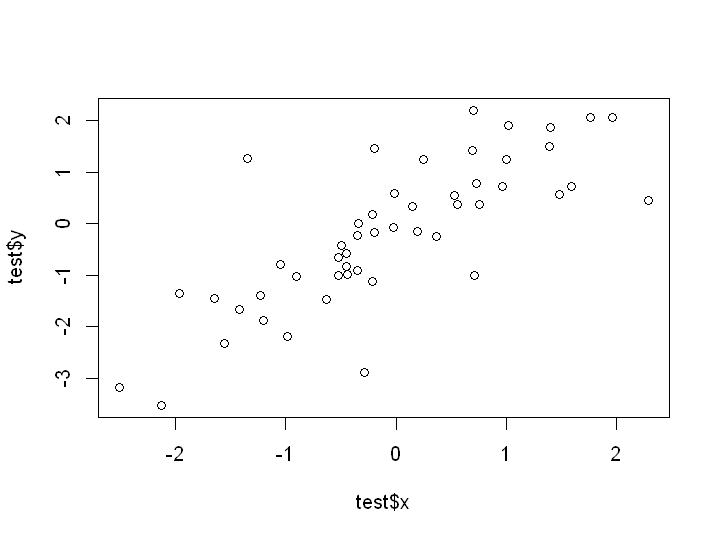

In [6]:
plot(test$x, test$y)

# Note that we can also 'attach()' the data to avoid the need for dollar signs, but this can lead 
# to problems with the search path... Remember to 'detach()' to avoid the wrong object being found. 

In [7]:
# Now let's try something more complicated... First, load the 'dplyr' library for data manipulation
# and show the built-in 'iris' dataframe, which contains flower morphology parameters.
library(dplyr)
iris


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [8]:
# Now, try a simple t-test comparing flower sepal length between species
t.test(iris[iris$Species == 'setosa',]$Sepal.Length, iris[iris$Species == 'virginica',]$Sepal.Length)


	Welch Two Sample t-test

data:  iris[iris$Species == "setosa", ]$Sepal.Length and iris[iris$Species == "virginica", ]$Sepal.Length
t = -15.386, df = 76.516, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.78676 -1.37724
sample estimates:
mean of x mean of y 
    5.006     6.588 


In [9]:
# If you want to know exactly what the 't.test' function does, type:
?t.test

In [10]:
# If we want to be more concise, we can assign the t-test result to a variable...
ttest <- t.test(iris[iris$Species == 'setosa',]$Sepal.Length, iris[iris$Species == 'virginica',]$Sepal.Length)
# ...and access the stats of interest like so:
ttest$p.value 

[1] 3.966867e-25

In [11]:
# Data types in R: vectors, lists, matrices, arrays, factors, and data frames 

# Factors are grouping variables with associated labels

# Advanced plotting with ggplot2

## ggplot - 'grammar of graphics'

## Each plot is envisioned as a series of layers - a theme, facets, scales, data

## Allows for a lot of flexibility - data are easily overplotted, facetted, and grouped using 'facet' and 'aesthetic' mappings

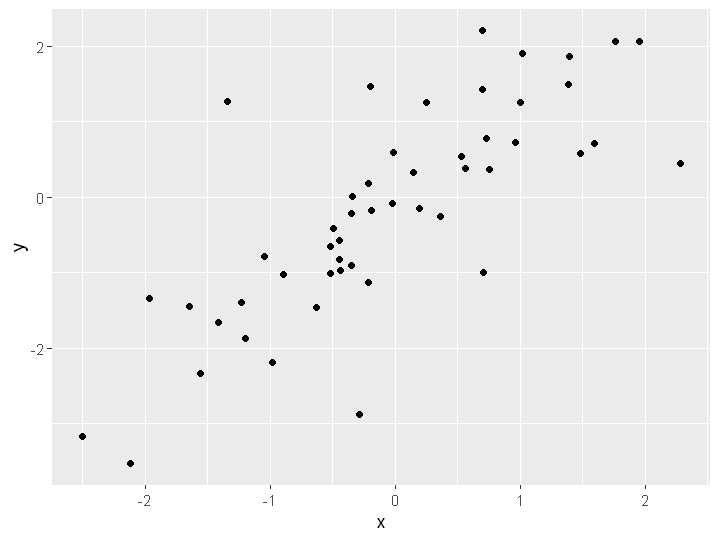

In [12]:
# Load the ggplot2 library and re-plot our scatter plot from earlier...
library(ggplot2)

scatter_plot <- ggplot(data = test, aes(x = x, y = y))
scatter_plot + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


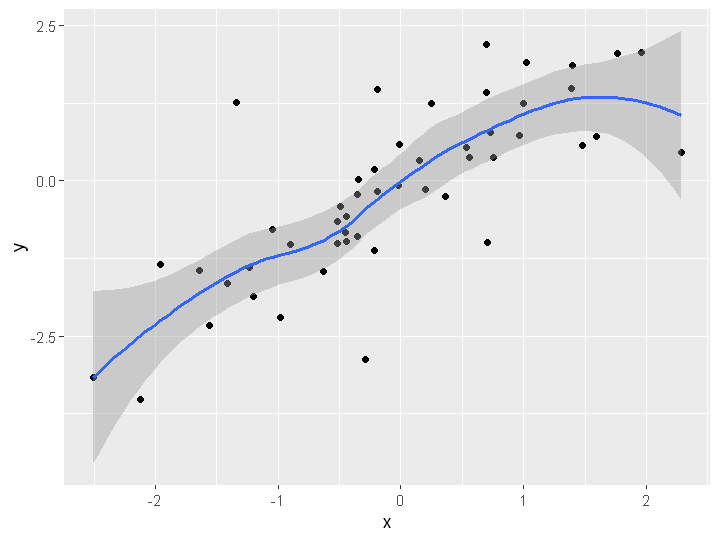

In [13]:
# Let's try adding a regression line...
scatter_plot + geom_point() + geom_smooth()

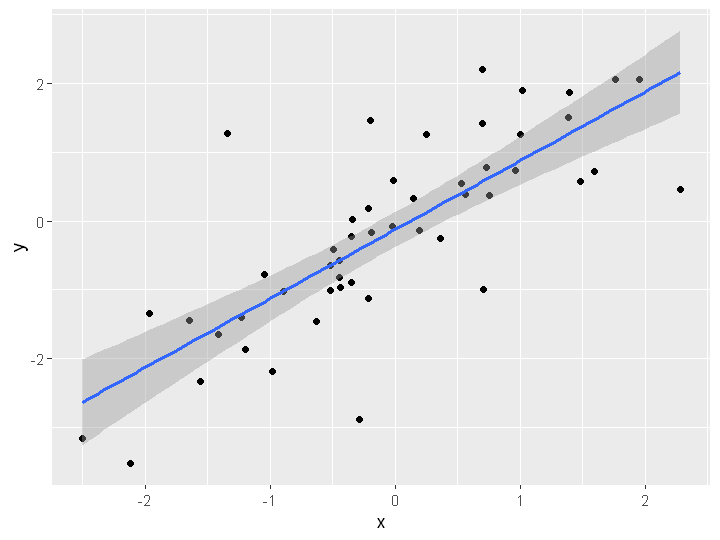

In [14]:
# That wasn't quite right. Let's specify the method for 'geom_smooth()'
scatter_plot + geom_point() + geom_smooth(method = 'lm')

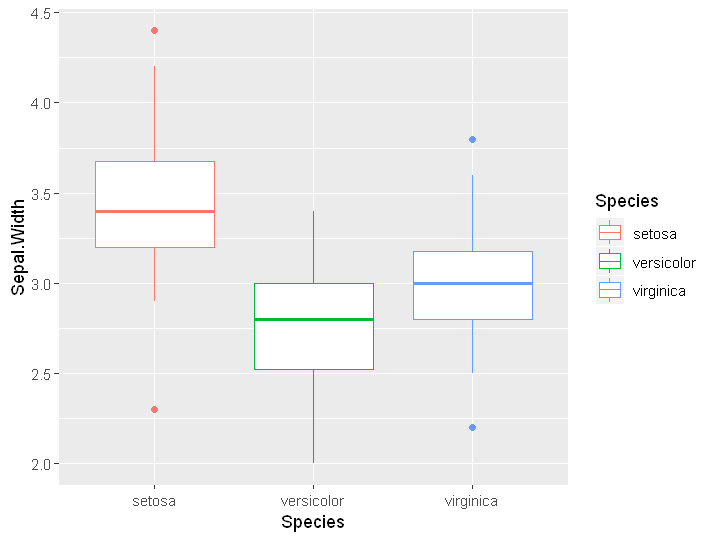

In [23]:
# Now let's try another common plot type - the boxplot
box_data <- ggplot(data = iris, aes(x = Species, y = Sepal.Width, colour = Species))
box_data + geom_boxplot()

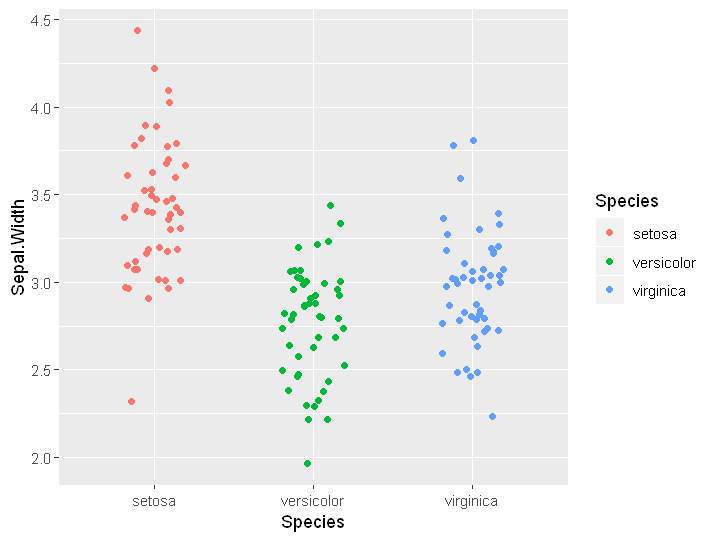

In [16]:
# Jitter shows the raw data, 
box_data + geom_jitter(width = 0.2)

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


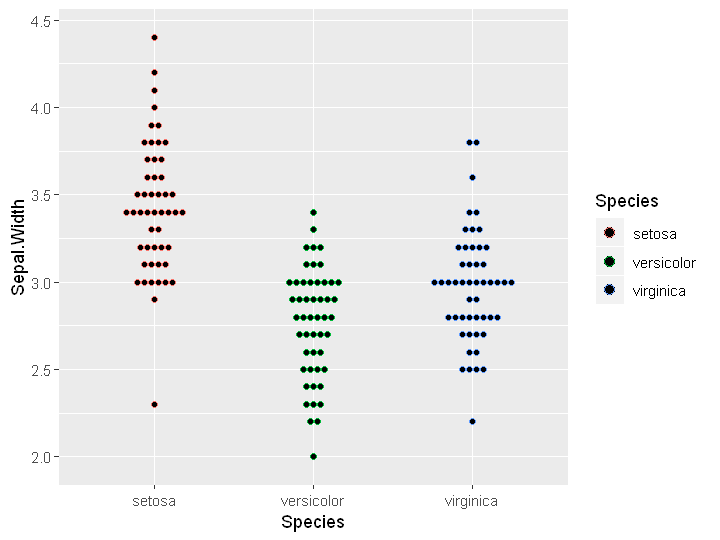

In [17]:
box_data + geom_dotplot(binaxis = "y", stackdir = "center", dotsize = 0.5)

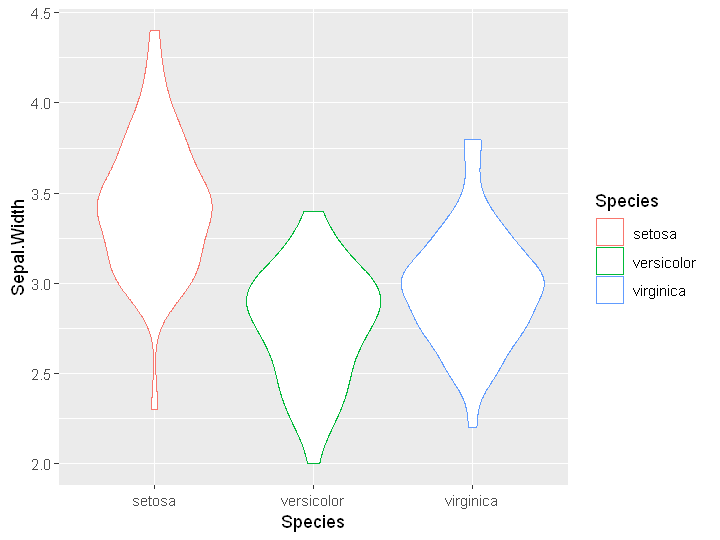

In [18]:
box_data + geom_violin(scale = "area")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


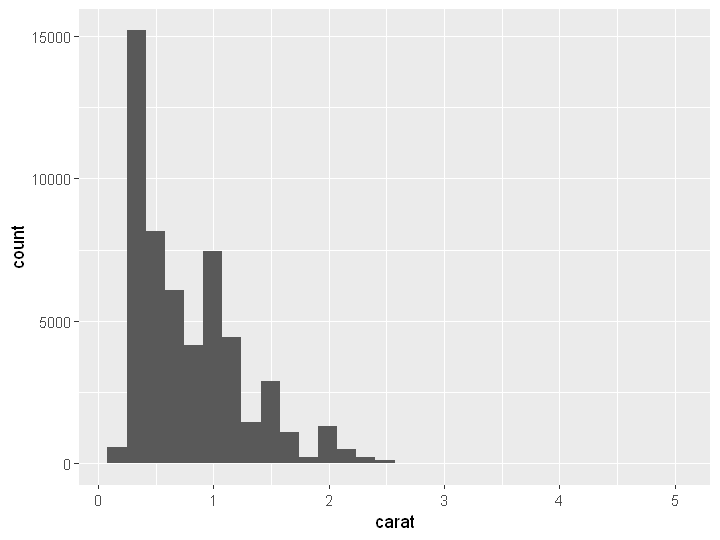

In [19]:
# Let's try a new dataset - 'diamonds' - to demonstrate histograms
plot_histo <- ggplot(diamonds, aes(carat)) 
plot_histo + geom_histogram()

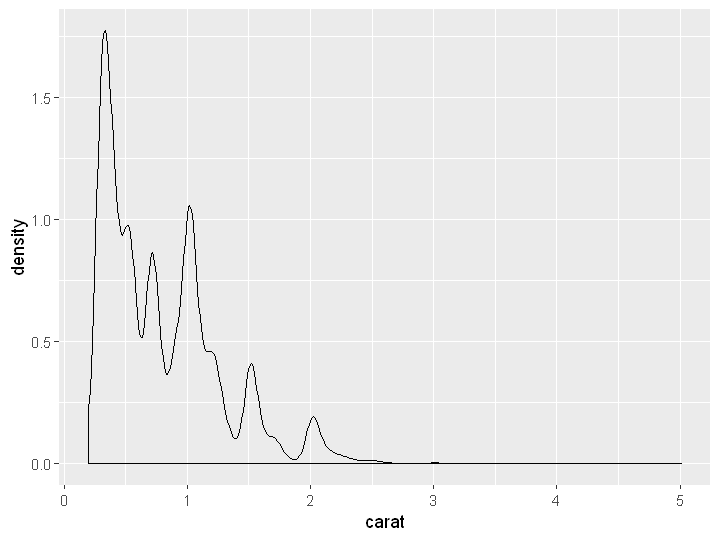

In [20]:
# Alternatively, display the data as a density plot
plot_histo + geom_density()

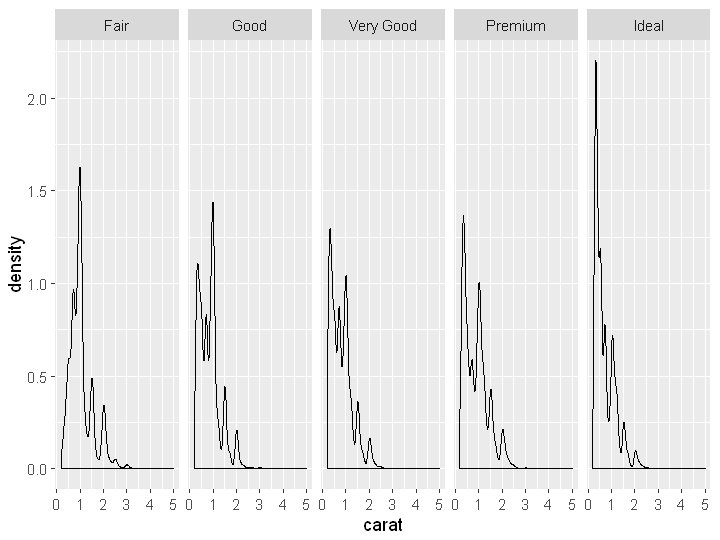

In [21]:
# One last useful tool - the ggplot2 'facet'. Let's see what happens if we facet by the factor 'cut'
plot_histo + geom_density() + facet_grid(. ~ cut)

# Exercise

## Add some of the following arguments to the 'geom' calls shown earlier, outside of the aes() function: alpha (= 0-1), fill, colour, size. Set any of these equal to a factor variable inside aes() to cause them vary by group  

## Try adding (literally '+') these layers to the previous plots, and see what happens:

## theme_bw(), theme_classic()  *Alternatives to ggplot's grey theme* 

## scale_colour_viridis_d()  *A colourblind-friendly colour scale*  

# Summary

## R has several advantages over SPSS: it's open-source, lightweight, flexible, and easily scriptable - for better reproducibility.

## It has a large and engaged community, plus packages and features that are absent from most commercial software - e.g. plotting geospatial data.

## It is a competitor with Python, but is better-suited to producing statistical models or beautiful data visualisations, Python is more useful for data science and machine-learning applications.
